In [2]:
# Basic Libraries
import numpy as np
import random
import datetime
import pandas as pd
import scipy.stats as stats
# Visulization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

# preprocessing and Model biulding Libraries
from numpy import sort
from pandas import set_option
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer
from matplotlib.cbook import boxplot_stats
from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from mlxtend.plotting import plot_confusion_matrix
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, fbeta_score, make_scorer, recall_score  
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

## **1. Dataset Insights:**

In [ ]:
#data=pd.read_csv('/content/uci-secom.csv') # reading data from Colab

In [ ]:
data=pd.read_csv('/Users/onkarshinde/Desktop/Case study/uci-secom.csv') # reading data from Local

In [ ]:
data.shape

(1567, 592)

**Remark 1:** We have 1567 rows and 592 columns in our dataset.


In [ ]:
data.head(3)

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   

          6       7       8  ...       581     582     583     584     585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035  2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055  4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039  3.1745   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  

[3 rows x 592 columns]

In [ ]:
data.describe()

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.000000     1.191000    -0.053400  ...   
25%     100.0    97.920000     0.121100     1.411200    -0.010800  ...   
50%     100.0   101.512200     0.122400     1.461600    -0.001300  ...   
75%     100.0   104.586700     0.123800     1.516900     0.008400  ...   
max     100.0   129.252200     0.128600     1.656400     0.074900  ...   

              581          582          583          584          585  \
count  618.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean    97.934373     0.500096     0.015318     0.003847     3.067826   
std     87.520966     0.003404     0.017180     0.003720     3.578033   
min      0.000000     0.477800     0.006000     0.001700     1.197500   
25%     46.184900     0.497900     0.011600     0.003100     2.306500   
50%     72.288900     0.500200     0.013800     0.003600     2.757650   
75%    116.539150     0.502375     0.016500     0.004100     3.295175   
max    737.304800     0.509800     0.476600     0.104500    99.303200   

               586          587          588          589    Pass/Fail  
count  1566.000000  1566.000000  1566.000000  1566.000000  1567.000000  
mean      0.021458     0.016475     0.005283    99.670066    -0.867262  
std       0.012358     0.008808     0.002867    93.891919     0.498010  
min      -0.016900     0.003200     0.001000     0.000000    -1.000000  
25%       0.013425     0.010600     0.003300    44.368600    -1.000000  
50%       0.020500     0.014800     0.004600    71.900500    -1.000000  
75%       0.027600     0.020300     0.006400   114.749700    -1.000000  
max       0.102800     0.079900     0.028600   737.304800     1.000000  

[8 rows x 591 columns]

**Remark-2:**
  1.  Counts per feature: Some columns have less than 1567 counts that means they posses missing values.
  2.  There are features with constant values. That means standard deviation is zero for these columns.
  3.  scale defference present in all the features. 

# **Feature Observations:**

## 1. Date time object: Feature 'Time' 




In [ ]:
pd.set_option('display.max_rows', None)
data_time=pd.DataFrame(data['Time'])
data_time.head(3)

Time
0  2008-07-19 11:55:00
1  2008-07-19 12:32:00
2  2008-07-19 13:17:00

**Remark 3:**
1. The feature 'Time' is misleading in this dataset. When we verify with source datset. it is found that month and dates anre swapped in some rows of the dataset.
2. So we dropped this feature and prepare this particular Feature from soucer dataset.
3. Following section we have analyse the monthly pass/fail of wafers.

## 1.1 Preprocessing for feature **"Time"**: 

In [ ]:
#ori_df=pd.read_csv('/content/secom_labels.data',header=None)
ori_df=pd.read_csv('/Users/onkarshinde/Desktop/Case study/data/secom_labels.data',header=None)
ori_df.columns=['label']
new_df=pd.DataFrame()
label=[]
Time=[]
for i in ori_df['label']:
    label.append(i[:2])
    a2=i[2:].strip('\" "')
    Time.append(a2)
    
new_df['label']=label
new_df['Time']= Time

In [ ]:
from datetime import datetime
datetime_object=[]
for i in new_df['Time']:
     #print(i)
     datetime_str = i

     datetime = datetime.strptime(datetime_str, '%d/%m/%Y  %H:%M:%S')
     
     datetime_object.append(datetime)
new_df['date_time']=datetime_object

In [ ]:
new_df['year'] = pd.DatetimeIndex(new_df['date_time']).year
new_df['month'] = pd.DatetimeIndex(new_df['date_time']).month
new_df['date'] = pd.DatetimeIndex(new_df['date_time']).day

In [ ]:
#This consists of only year 2008
print("Year: ", new_df.year.unique())
#This consists of all the months of 2008
print("Month: ",new_df.month.unique())
#All the dates of the month are not there, might be related to production on certain days only
print("Date: ", new_df.date.unique())

Year:  [2008]
Month:  [ 7  8  9 10]
Date:  [19 20 21 22 23 25 27 28 29 30 31  1  2  3  4  5  6  7  8  9 10 11 12 13
 15 16 17 18 24 14 26]


**Remark 4 :**
1. This dataset is prepared in 2008  and measurement recorded in the month of july,august,september and october.


### 1.2  Creating New Features year, month and date from 'Time' Feature 

In [ ]:
data.drop(columns=['Time'],inplace= True) # removing misleading columns 'Time'

In [ ]:
new_df=new_df.drop(columns=['label','Time','date_time'])

In [ ]:
data =pd.concat([new_df, data],axis=1, join='inner') # Final dataset

In [ ]:
data.head(5)

year  month  date        0        1          2          3       4      5  \
0  2008      7    19  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008      7    19  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008      7    19  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008      7    19  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008      7    19  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6  ...       581     582     583     584      585     586     587  \
0   97.6133  ...       NaN  0.5005  0.0118  0.0035   2.3630     NaN     NaN   
1  102.3433  ...  208.2045  0.5019  0.0223  0.0055   4.4447  0.0096  0.0201   
2   95.4878  ...   82.8602  0.4958  0.0157  0.0039   3.1745  0.0584  0.0484   
3  104.2367  ...   73.8432  0.4990  0.0103  0.0025   2.0544  0.0202  0.0149   
4  100.3967  ...       NaN  0.4800  0.4766  0.1045  99.3032  0.0202  0.0149   

      588       589  Pass/Fail  
0     NaN       NaN         -1  
1  0.0060  208.2045         -1  
2  0.0148   82.8602          1  
3  0.0044   73.8432         -1  
4  0.0044   73.8432         -1  

[5 rows x 594 columns]

### 1.3 **Distribution of classes** : Pass_Fail

In [ ]:
data=data.rename(columns={'Pass/Fail':'Pass_Fail'}) # remaning for increase in readiability
data['Pass_Fail']=data['Pass_Fail'].apply(lambda x: 'Pass' if x == -1 else 'Fail')
data.head(3)

year  month  date        0        1          2          3       4      5  \
0  2008      7    19  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008      7    19  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008      7    19  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   

          6  ...       581     582     583     584     585     586     587  \
0   97.6133  ...       NaN  0.5005  0.0118  0.0035  2.3630     NaN     NaN   
1  102.3433  ...  208.2045  0.5019  0.0223  0.0055  4.4447  0.0096  0.0201   
2   95.4878  ...   82.8602  0.4958  0.0157  0.0039  3.1745  0.0584  0.0484   

      588       589  Pass_Fail  
0     NaN       NaN       Pass  
1  0.0060  208.2045       Pass  
2  0.0148   82.8602       Fail  

[3 rows x 594 columns]

In [ ]:
cleaned_data=data.to_csv('data_final.csv', index=False) # saving final dataset in local

In [ ]:
#data=pd.read_csv('/content/data_final.csv') read from colab
data=pd.read_csv('/Users/onkarshinde/Desktop/Case study/data_final.csv') #read from local

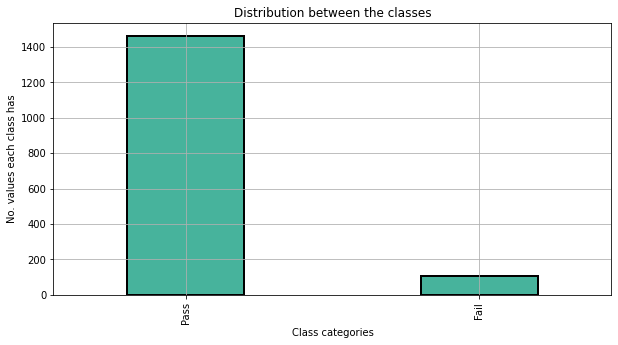

In [ ]:
fig = plt.figure(figsize = (10, 5))
clases=data['Pass_Fail'].value_counts().plot(kind='bar',color ='#47B39C',width = 0.4,edgecolor="black", linewidth=2)
plt.xlabel("Class categories")
plt.ylabel("No. values each class has")
plt.title("Distribution between the classes")
plt.grid('Grey')
plt.show()


In [ ]:
check=data['Pass_Fail'].value_counts()
print("Total dataset : ", check[0]+check[1])
print("Majority class : Pass --->" , check[0])
print("Minority Class : Fail ---> ", check[1])
print("Majority class in % : Pass --->" , check[0]/(check[0]+check[1])*100)
print("Minority Class in % : Fail ---> ", check[1]/(check[0]+check[1])*100)

Total dataset :  1567
Majority class : Pass ---> 1463
Minority Class : Fail --->  104
Majority class in % : Pass ---> 93.36311423101468
Minority Class in % : Fail --->  6.636885768985322


# **Initial Observations On dataset :**

0. We have 1567 rows and 592 columns.
1.  590 features all are real values (numerical) in nature. As per dataset description, these are sensor readings(process parameters) with scale difference. Also, the units of these measurements are not provided.
2. Our first feature is 'Time' which is the time at measurements were recorded. However, this column is misleading in kaggle dataset. There is swapping of dates and month numeric values. We have verify with original dataset and corrected in subsequesnt sections of this notebook. Source dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/secom/ 
3. Then we have Class lable pass/fail, pass means good quality wafer which takes values -1 and bad quality wafer which takes 1. So, we can pose this as a binary classification problem.
4. The dataset is **highly imbalance** i.e majority class is 93.36% with 1463 data points and minority class is only 6.63% with 104 columns.
5. Some of the columns are constant values which is zero variation.
6. There are significant amount of missing values present in the dataset.
7. There are 538 columns contains missing value. Minimum no of missing value for some of them is  one and on the other hand there are also columns which are in high no of missing values i.e more than 30 % of column values.
8. There are no duplicate records in the dataset.


# **Analysis of features** : EDA

## 1. Feature : **Time**

In [ ]:
data.head(2)

year  month  date        0        1          2          3       4      5  \
0  2008      7    19  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008      7    19  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   

          6  ...       581     582     583     584     585     586     587  \
0   97.6133  ...       NaN  0.5005  0.0118  0.0035  2.3630     NaN     NaN   
1  102.3433  ...  208.2045  0.5019  0.0223  0.0055  4.4447  0.0096  0.0201   

     588       589  Pass_Fail  
0    NaN       NaN       Pass  
1  0.006  208.2045       Pass  

[2 rows x 594 columns]

In [ ]:
data.shape

(1567, 594)

 **1.1 Monthly class distribution:**

[Text(0.5, 1.0, 'Monthly assesment of wafers (Pass and Fail) ')]

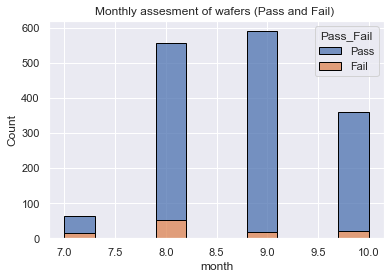

In [ ]:
sns.set(color_codes=True)
sns.histplot(data['Pass_Fail'],x=data['month'],bins=10,hue=data['Pass_Fail'], multiple="stack",color = 'red',edgecolor="black", linewidth=1).set(title='Monthly assesment of wafers (Pass and Fail) ')

In [ ]:
df_monthwise=data[['month','Pass_Fail']].copy()

In [ ]:
df_monthwise[df_monthwise['month']==7].value_counts()

month  Pass_Fail
7      Pass         49
       Fail         14
dtype: int64

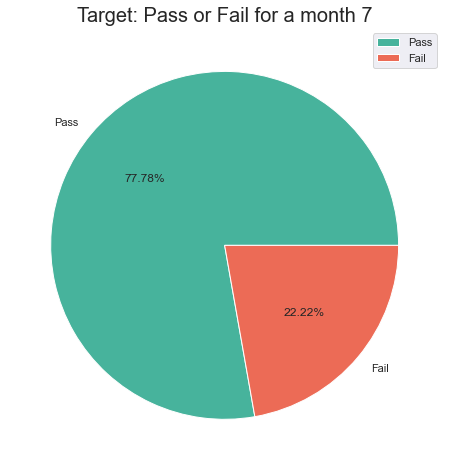

In [ ]:
labels = ['Pass', 'Fail']
size = df_monthwise[df_monthwise['month']==7].value_counts()
colors=['#47B39C','#EC6B56']
plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, colors=colors, autopct = "%.2f%%")
plt.axis('off')
plt.title('Target: Pass or Fail for a month 7', fontsize = 20)
plt.legend()
plt.show()


In [ ]:
df_monthwise[df_monthwise['month']==8].value_counts()

month  Pass_Fail
8      Pass         504
       Fail          51
dtype: int64

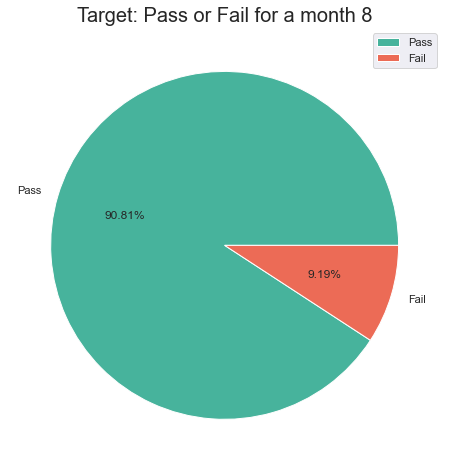

In [ ]:
labels = ['Pass', 'Fail']
size = df_monthwise[df_monthwise['month']==8].value_counts()
colors=['#47B39C','#EC6B56']
plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, colors=colors, autopct = "%.2f%%")
plt.axis('off')
plt.title('Target: Pass or Fail for a month 8', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
df_monthwise[df_monthwise['month']==9].value_counts()

month  Pass_Fail
9      Pass         573
       Fail          17
dtype: int64

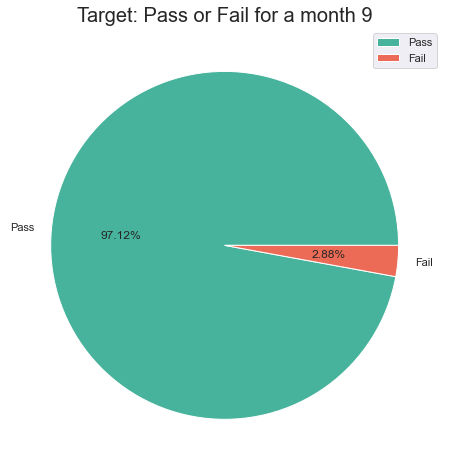

In [ ]:
labels = ['Pass', 'Fail']
size = df_monthwise[df_monthwise['month']==9].value_counts()
colors=['#47B39C','#EC6B56']
plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, colors=colors, autopct = "%.2f%%")
plt.axis('off')
plt.title('Target: Pass or Fail for a month 9', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
df_monthwise[df_monthwise['month']==10].value_counts()

month  Pass_Fail
10     Pass         337
       Fail          22
dtype: int64

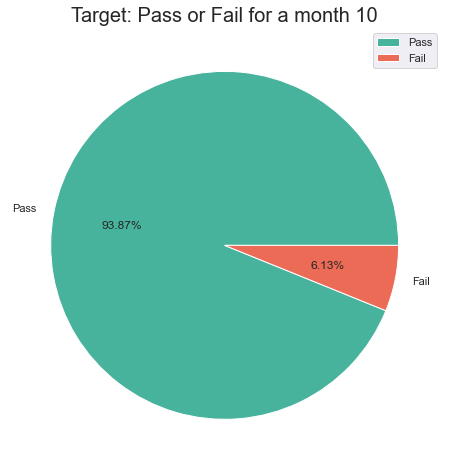

In [ ]:
labels = ['Pass', 'Fail']
size = df_monthwise[df_monthwise['month']==10].value_counts()
colors=['#47B39C','#EC6B56']
plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, colors=colors, autopct = "%.2f%%")
plt.axis('off')
plt.title('Target: Pass or Fail for a month 10', fontsize = 20)
plt.legend()
plt.show()

## Monthly observations on class Labels :
1.  This dataset is generated in  year of 2008 and measurements were taken only in 4 consecutive months July, August, September and October.
2. Maxixmum no of measuremnts 590 were recorded in the month of September in which 97.2% corresponds to class "Pass" and only 2.27 % are in class "Fail".

3. Minimum no of measurements 64 were recorded in the month of July in which 77% of measurement belongs to class "Pass" and around 23% belngs to the class " Fail".




# 2. **Observation on Numerical Features**:


In [3]:
data=pd.read_csv('/content/data_final.csv')
#data=pd.read_csv('/Users/onkarshinde/Desktop/Case study/data_final.csv')

In [4]:
measurement=data.copy()

In [5]:
measurement.shape

(1567, 594)

In [ ]:
# change the label values to improve the readabiltity we wiil replace fail =-1 and pass='1']

In [6]:
measurement['Pass_Fail']=measurement['Pass_Fail'].apply(lambda x: '1' if x == 'Pass' else '0')


In [7]:
measurement.head(5)

year  month  date        0        1          2          3       4      5  \
0  2008      7    19  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008      7    19  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008      7    19  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008      7    19  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008      7    19  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6  ...       581     582     583     584      585     586     587  \
0   97.6133  ...       NaN  0.5005  0.0118  0.0035   2.3630     NaN     NaN   
1  102.3433  ...  208.2045  0.5019  0.0223  0.0055   4.4447  0.0096  0.0201   
2   95.4878  ...   82.8602  0.4958  0.0157  0.0039   3.1745  0.0584  0.0484   
3  104.2367  ...   73.8432  0.4990  0.0103  0.0025   2.0544  0.0202  0.0149   
4  100.3967  ...       NaN  0.4800  0.4766  0.1045  99.3032  0.0202  0.0149   

      588       589  Pass_Fail  
0     NaN       NaN          1  
1  0.0060  208.2045          1  
2  0.0148   82.8602          0  
3  0.0044   73.8432          1  
4  0.0044   73.8432          1  

[5 rows x 594 columns]

# **2.1 Summary on numerical Features:**

In [8]:
# this code snippet is from with modification as per our case study : @mohit Kumar
def summary_numerical(df, pred=None):
    """
      This function returns the informations of numerical features from the dataset.
      It rturns the 'Types of features', 'Counts per features', 
      'Uniques values in feature', 'Nulls respective feature', 'Min values in feature',
      likewise 'Max','std','var' in fetures.
    
    """
  
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    std =df.std()
    var=df.var()
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max','std','var']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max,std,var], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str



In [9]:
display(summary_numerical(measurement).sort_values(by='Nulls', ascending=False))

Data shape: (1567, 594)
___________________________
Data Types:
float64    590
int64        3
object       1
Name: Types, dtype: int64
___________________________


Types  Counts  Uniques  Nulls       Min        Max         std  \
292   float64     138       93   1429    0.0041     0.0831    0.011494   
158   float64     138      139   1429  234.0996  2505.2998  406.848810   
157   float64     138      129   1429    0.0118     0.2876    0.039538   
293   float64     138      139   1429   82.3233    879.226  137.692483   
358   float64     226       21   1341    0.0017     0.0047    0.000395   
...       ...     ...      ...    ...       ...        ...         ...   
429   float64    1567     1542      0    0.7837   186.6164    6.435390   
250   float64    1567     1566      0   21.0107  1119.7042   54.597274   
251   float64    1567      143      0    0.0003     0.9909    0.037472   
252   float64    1567     1533      0    0.7673  2549.9885   64.354756   
year    int64    1567        1      0      2008       2008    0.000000   

               var  
292   1.321041e-04  
158   1.655260e+05  
157   1.563226e-03  
293   1.895922e+04  
358   1.557941e-07  
...            ...  
429   4.141425e+01  
250   2.980862e+03  
251   1.404188e-03  
252   4.141535e+03  
year  0.000000e+00  

[594 rows x 8 columns]

**Remark- 5 : On all Numerical columns:**
1. All the features are float64 datatype with month, year are int64. The class label is string "Object" datatype.
2. There are large no of records missing in some of features.
3. There are also columns posseses zero standard deviation that means noo variation in the values. i.e constant values throughtout columns.
4. Regarding missing values, there is an intresting pattern. We can conclude that these sensors simply not active at the time of measurements or wafers did not go under that particular process.


# **2.2. Checking the original Ditribution of sensor measurements with respect to class labels :**

In [10]:
measurements_1=measurement.drop(columns=['year','month','date','Pass_Fail'],axis=1)


In [11]:
measurements_1.head(5)

0        1          2          3       4      5         6       7  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   

        8       9  ...     580       581     582     583     584      585  \
0  1.5005  0.0162  ...     NaN       NaN  0.5005  0.0118  0.0035   2.3630   
1  1.4966 -0.0005  ...  0.0060  208.2045  0.5019  0.0223  0.0055   4.4447   
2  1.4436  0.0041  ...  0.0148   82.8602  0.4958  0.0157  0.0039   3.1745   
3  1.4882 -0.0124  ...  0.0044   73.8432  0.4990  0.0103  0.0025   2.0544   
4  1.5031 -0.0031  ...     NaN       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  
0     NaN     NaN     NaN       NaN  
1  0.0096  0.0201  0.0060  208.2045  
2  0.0584  0.0484  0.0148   82.8602  
3  0.0202  0.0149  0.0044   73.8432  
4  0.0202  0.0149  0.0044   73.8432  

[5 rows x 590 columns]

In [12]:
measurements_df = measurements_1.add_prefix('sensor_')

In [13]:
measurements_df.head(5)

sensor_0  sensor_1   sensor_2   sensor_3  sensor_4  sensor_5  sensor_6  \
0   3030.93   2564.00  2187.7333  1411.1265    1.3602     100.0   97.6133   
1   3095.78   2465.14  2230.4222  1463.6606    0.8294     100.0  102.3433   
2   2932.61   2559.94  2186.4111  1698.0172    1.5102     100.0   95.4878   
3   2988.72   2479.90  2199.0333   909.7926    1.3204     100.0  104.2367   
4   3032.24   2502.87  2233.3667  1326.5200    1.5334     100.0  100.3967   

   sensor_7  sensor_8  sensor_9  ...  sensor_580  sensor_581  sensor_582  \
0    0.1242    1.5005    0.0162  ...         NaN         NaN      0.5005   
1    0.1247    1.4966   -0.0005  ...      0.0060    208.2045      0.5019   
2    0.1241    1.4436    0.0041  ...      0.0148     82.8602      0.4958   
3    0.1217    1.4882   -0.0124  ...      0.0044     73.8432      0.4990   
4    0.1235    1.5031   -0.0031  ...         NaN         NaN      0.4800   

   sensor_583  sensor_584  sensor_585  sensor_586  sensor_587  sensor_588  \
0      0.0118      0.0035      2.3630         NaN         NaN         NaN   
1      0.0223      0.0055      4.4447      0.0096      0.0201      0.0060   
2      0.0157      0.0039      3.1745      0.0584      0.0484      0.0148   
3      0.0103      0.0025      2.0544      0.0202      0.0149      0.0044   
4      0.4766      0.1045     99.3032      0.0202      0.0149      0.0044   

   sensor_589  
0         NaN  
1    208.2045  
2     82.8602  
3     73.8432  
4     73.8432  

[5 rows x 590 columns]

In [ ]:
#data =pd.concat([new_df, data],axis=1, join='inner')

In [14]:
measurement = measurement['Pass_Fail']

In [15]:
measurement=pd.concat([measurements_df, measurement],axis=1, join='inner')

In [16]:
measurement.head(5)

sensor_0  sensor_1   sensor_2   sensor_3  sensor_4  sensor_5  sensor_6  \
0   3030.93   2564.00  2187.7333  1411.1265    1.3602     100.0   97.6133   
1   3095.78   2465.14  2230.4222  1463.6606    0.8294     100.0  102.3433   
2   2932.61   2559.94  2186.4111  1698.0172    1.5102     100.0   95.4878   
3   2988.72   2479.90  2199.0333   909.7926    1.3204     100.0  104.2367   
4   3032.24   2502.87  2233.3667  1326.5200    1.5334     100.0  100.3967   

   sensor_7  sensor_8  sensor_9  ...  sensor_581  sensor_582  sensor_583  \
0    0.1242    1.5005    0.0162  ...         NaN      0.5005      0.0118   
1    0.1247    1.4966   -0.0005  ...    208.2045      0.5019      0.0223   
2    0.1241    1.4436    0.0041  ...     82.8602      0.4958      0.0157   
3    0.1217    1.4882   -0.0124  ...     73.8432      0.4990      0.0103   
4    0.1235    1.5031   -0.0031  ...         NaN      0.4800      0.4766   

   sensor_584  sensor_585  sensor_586  sensor_587  sensor_588  sensor_589  \
0      0.0035      2.3630         NaN         NaN         NaN         NaN   
1      0.0055      4.4447      0.0096      0.0201      0.0060    208.2045   
2      0.0039      3.1745      0.0584      0.0484      0.0148     82.8602   
3      0.0025      2.0544      0.0202      0.0149      0.0044     73.8432   
4      0.1045     99.3032      0.0202      0.0149      0.0044     73.8432   

   Pass_Fail  
0          1  
1          1  
2          0  
3          1  
4          1  

[5 rows x 591 columns]

In [17]:
class_labels = measurement['Pass_Fail'].unique()  # [ 1,0]
#print(class_labels[1])
class_0=measurement.loc[measurement['Pass_Fail'] == class_labels[1]]
class_1=measurement.loc[measurement['Pass_Fail'] == class_labels[0]]
print(class_0.shape)
print(class_1.shape)

(104, 591)
(1463, 591)


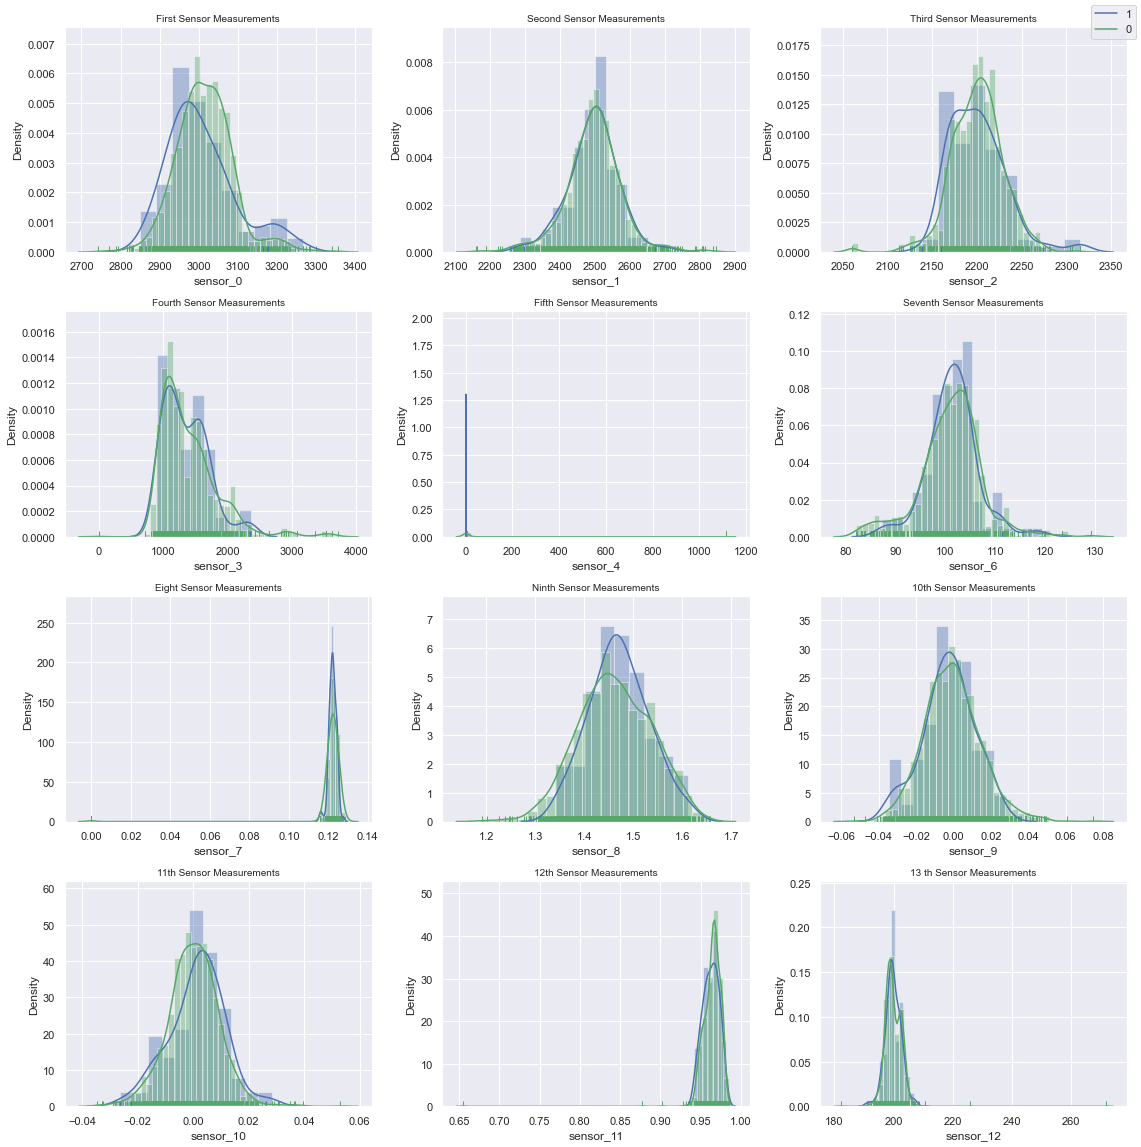

In [ ]:
fig = plt.figure(figsize=(16,16))

plt.subplot(4, 3, 1)
sns.distplot(class_0['sensor_0'], hist=True, rug=True,)
sns.distplot(class_1['sensor_0'], hist=True, rug=True,)
plt.title('First Sensor Measurements', fontsize = 10)

plt.subplot(4, 3, 2)
sns.distplot(class_0['sensor_1'], hist=True, rug=True)
sns.distplot(class_1['sensor_1'], hist=True, rug=True)
plt.title('Second Sensor Measurements', fontsize = 10)

plt.subplot(4, 3, 3)
sns.distplot(class_0['sensor_2'], hist=True, rug=True)
sns.distplot(class_1['sensor_2'], hist=True, rug=True)
plt.title('Third Sensor Measurements', fontsize = 10)

plt.subplot(4, 3, 4)
sns.distplot(class_0['sensor_3'], hist=True, rug=True)
sns.distplot(class_1['sensor_3'], hist=True, rug=True)
plt.title('Fourth Sensor Measurements', fontsize = 10)

plt.subplot(4, 3, 5)
sns.distplot(class_0['sensor_4'], hist=True, rug=True)
sns.distplot(class_1['sensor_4'], hist=True, rug=True)
plt.title('Fifth Sensor Measurements', fontsize = 10)

plt.subplot(4, 3, 6)
sns.distplot(class_0['sensor_6'], hist=True, rug=True)
sns.distplot(class_1['sensor_6'], hist=True, rug=True)
plt.title('Seventh Sensor Measurements', fontsize = 10)

plt.subplot(4, 3, 7)
sns.distplot(class_0['sensor_7'], hist=True, rug=True)
sns.distplot(class_1['sensor_7'], hist=True, rug=True)
plt.title('Eight Sensor Measurements', fontsize = 10)

plt.subplot(4, 3, 8)
sns.distplot(class_0['sensor_8'], hist=True, rug=True)
sns.distplot(class_1['sensor_8'], hist=True, rug=True)
plt.title('Ninth Sensor Measurements', fontsize = 10)

plt.subplot(4, 3, 9)
sns.distplot(class_0['sensor_9'], hist=True, rug=True)
sns.distplot(class_1['sensor_9'], hist=True, rug=True)
plt.title('10th Sensor Measurements', fontsize = 10)

plt.subplot(4, 3, 10)
sns.distplot(class_0['sensor_10'], hist=True, rug=True)
sns.distplot(class_1['sensor_10'], hist=True, rug=True)
plt.title('11th Sensor Measurements', fontsize = 10)

plt.subplot(4, 3, 11)
sns.distplot(class_0['sensor_11'], hist=True, rug=True)
sns.distplot(class_1['sensor_11'], hist=True, rug=True)
plt.title('12th Sensor Measurements', fontsize = 10)


plt.subplot(4, 3, 12)
sns.distplot(class_0['sensor_12'], hist=True, rug=True)
sns.distplot(class_1['sensor_12'], hist=True, rug=True)
plt.title('13 th Sensor Measurements', fontsize = 10)



fig.legend(labels=['1','0'])
fig.tight_layout()
plt.show()

 **Remark 6: density plots**
1. The nature of PDFs of first 12 sensor measurements are shown.
2. There are some sensor measurements with highly skewed in nature. 
3. RED pdf belogns to the Fail class of wafer and BLUE curves are for Pass class.



## **2.3 Missing Value Features:**

In [18]:
col_mis_val=[]
for col in measurement:
    if measurement[col].isnull().sum() > 0:
        col_mis_val.append(col)
# print("Sensor with missing values", col_mis_val)
print("Total no. of sensors posses missing values : ", len(col_mis_val))

Total no. of sensors posses missing values :  538


In [ ]:
# since we have large number of columns which have missing values that means we need to more focus on these values.
# Also we need to see how many percentage of missing values per column 
# ideally we should have 1567 values per column but we saw that we have lot of missing values in some columns. 
# what we will do is the getting insights that how much percentage of missing value from each columns
col_mis_val=[]
col_per_miss={}
for col in measurement:
    total_val=1567
    miss_vals=measurement[col].isnull().sum()
    #print(miss_vals)
    if miss_vals > 78: # 5% of total records
      percentage_miss_vals=(miss_vals/total_val)*100

      col_per_miss[col]=percentage_miss_vals

print("no of columns which has missing values more than 5% is ---->",len(col_per_miss))

no of columns which has missing values more than 5% is ----> 52


Text(0.5, 1.0, 'Distribution of missing values across columns')

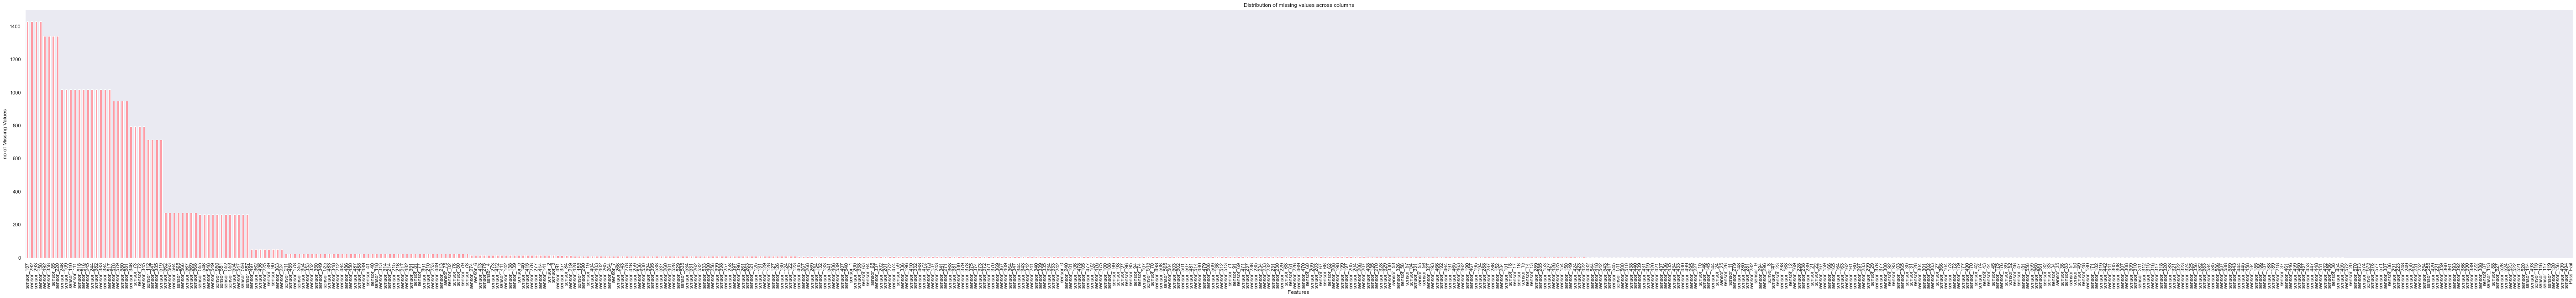

In [ ]:
fig = plt.figure(figsize = (100, 10))
measurement.isna().sum().sort_values(ascending=False).plot(kind='bar',color='#FF9DA6')
plt.grid(color='gray')
plt.xlabel("Features ")
plt.ylabel("no of Missing Values")
plt.title("Distribution of missing values across columns")

In [19]:

import plotly.express as px

df=measurement.isna().sum()*100/measurement.shape[0]
a = df[df>5].sort_values(ascending=False)
#print(len(a))
fig = px.bar(x=a.index, 
             y = a, 
             title='Percentage of missing values per feature (with >5% NaNs), data="sensor measurements"',
             text = round(a,1),
             color_discrete_sequence =['#FF9DA6']
             )
fig.update_xaxes(title_text='Features with more than 5% missing value (sorted)',type='category')
fig.update_yaxes(title_text='Percentage of missing values')
#fig.update_traces(marker_color='cyan')
fig.show(renderer='colab')
#fig.show()

**Remark : 7**
1. There are sensors(features) whic are having more no of missing datapoints. For exampls 4 sensos 292,293,257 and 158 has almost 91% data is missing.
2. There are 52 features out of 590 are missing more than 5% records.
3. There is pattern in the missing value features. i.e there are more than two columns which has same missing values. From this we can draw the conclusion that these sensors were not active during process or there is no  process corresponding to these sensors.
4. For this reason we will keep the all the missing value but fill them with zero.
5. We can also remove more than 30% missing value columns.
   


### **2.3.1 Filling Missing Values with Zeros:**

In [ ]:
measurement_zero=measurement.copy()

In [ ]:
measurement_zero.fillna(0,inplace=True)

In [ ]:
measurement_zero.to_csv('measurement_zero1.csv',index=False)

In [ ]:
measurement_zero=pd.read_csv('/Users/onkarshinde/Desktop/Case study/measurement_zero1.csv')

In [ ]:
measurement_zero.head()

sensor_0  sensor_1   sensor_2   sensor_3  sensor_4  sensor_5  sensor_6  \
0   3030.93   2564.00  2187.7333  1411.1265    1.3602     100.0   97.6133   
1   3095.78   2465.14  2230.4222  1463.6606    0.8294     100.0  102.3433   
2   2932.61   2559.94  2186.4111  1698.0172    1.5102     100.0   95.4878   
3   2988.72   2479.90  2199.0333   909.7926    1.3204     100.0  104.2367   
4   3032.24   2502.87  2233.3667  1326.5200    1.5334     100.0  100.3967   

   sensor_7  sensor_8  sensor_9  ...  sensor_581  sensor_582  sensor_583  \
0    0.1242    1.5005    0.0162  ...      0.0000      0.5005      0.0118   
1    0.1247    1.4966   -0.0005  ...    208.2045      0.5019      0.0223   
2    0.1241    1.4436    0.0041  ...     82.8602      0.4958      0.0157   
3    0.1217    1.4882   -0.0124  ...     73.8432      0.4990      0.0103   
4    0.1235    1.5031   -0.0031  ...      0.0000      0.4800      0.4766   

   sensor_584  sensor_585  sensor_586  sensor_587  sensor_588  sensor_589  \
0      0.0035      2.3630      0.0000      0.0000      0.0000      0.0000   
1      0.0055      4.4447      0.0096      0.0201      0.0060    208.2045   
2      0.0039      3.1745      0.0584      0.0484      0.0148     82.8602   
3      0.0025      2.0544      0.0202      0.0149      0.0044     73.8432   
4      0.1045     99.3032      0.0202      0.0149      0.0044     73.8432   

   Pass_Fail  
0          1  
1          1  
2          0  
3          1  
4          1  

[5 rows x 591 columns]

## **2.4 Constant values in columns:**

**2.4.1: Constant value columns:**

In [ ]:
measurement_zero.head()

sensor_0  sensor_1   sensor_2   sensor_3  sensor_4  sensor_5  sensor_6  \
0   3030.93   2564.00  2187.7333  1411.1265    1.3602     100.0   97.6133   
1   3095.78   2465.14  2230.4222  1463.6606    0.8294     100.0  102.3433   
2   2932.61   2559.94  2186.4111  1698.0172    1.5102     100.0   95.4878   
3   2988.72   2479.90  2199.0333   909.7926    1.3204     100.0  104.2367   
4   3032.24   2502.87  2233.3667  1326.5200    1.5334     100.0  100.3967   

   sensor_7  sensor_8  sensor_9  ...  sensor_581  sensor_582  sensor_583  \
0    0.1242    1.5005    0.0162  ...      0.0000      0.5005      0.0118   
1    0.1247    1.4966   -0.0005  ...    208.2045      0.5019      0.0223   
2    0.1241    1.4436    0.0041  ...     82.8602      0.4958      0.0157   
3    0.1217    1.4882   -0.0124  ...     73.8432      0.4990      0.0103   
4    0.1235    1.5031   -0.0031  ...      0.0000      0.4800      0.4766   

   sensor_584  sensor_585  sensor_586  sensor_587  sensor_588  sensor_589  \
0      0.0035      2.3630      0.0000      0.0000      0.0000      0.0000   
1      0.0055      4.4447      0.0096      0.0201      0.0060    208.2045   
2      0.0039      3.1745      0.0584      0.0484      0.0148     82.8602   
3      0.0025      2.0544      0.0202      0.0149      0.0044     73.8432   
4      0.1045     99.3032      0.0202      0.0149      0.0044     73.8432   

   Pass_Fail  
0          1  
1          1  
2          0  
3          1  
4          1  

[5 rows x 591 columns]

In [ ]:
def unique_columns(df):
    """a function to show unique values = 1 from  columns
     input: dataframe
     output: Columns which has only one value"""
    uni_col_list = []
    for column in df.columns:
        if df[column].nunique() == 1:
            uni_col_list.append(column)
    return uni_col_list

In [ ]:
constant_value_columns= unique_columns(measurement_zero)

In [ ]:
#print("Sensors having same reading constant value :" ,constant_value_columns)
print('Totol no of sensors with constant value:', len(constant_value_columns))

Totol no of sensors with constant value: 112


**Remark 8:**  112 columns does not have variations in the values.

**2.4.2: Zero Variance Columns:**

In [ ]:
def columns_var(df):
    """a function to show unique columns with column name
     input: dataframe
     output: Columns which has only one value"""
    low_var_col = []
    for column in df.columns:
        if df[column].var() == 0:
            low_var_col.append(column)
    return low_var_col

In [ ]:
low_var=measurement_zero.var()

In [ ]:
low_var=pd.DataFrame(low_var)

In [ ]:
low_var.rename(columns={0:'variance'},inplace=True)

In [ ]:
low_var.head(5)

variance
sensor_0   40081.901204
sensor_1   34156.862598
sensor_2   43767.473945
sensor_3  210623.419304
sensor_4    3147.710085

In [ ]:
a=low_var[low_var['variance'] == 0.0]

In [ ]:
print(len(a))

112


**Remark-9:** There are 112 columns which are having only one value and variance is zero. They will not contibute to the output. So we will remove them. 

**2.4.3: Removing 112 feaatures which are constant:**

In [ ]:
constant_col=a.index

In [ ]:
#remove_col=measurement.copy()

In [ ]:
#remove_col.head()

In [ ]:
measurement_zero.drop(columns =list(constant_col),inplace=True)

In [ ]:
measurement_zero.shape

(1567, 479)

In [ ]:
measurement_zero.head(5)

sensor_0  sensor_1   sensor_2   sensor_3  sensor_4  sensor_5  sensor_6  \
0   3030.93   2564.00  2187.7333  1411.1265    1.3602     100.0   97.6133   
1   3095.78   2465.14  2230.4222  1463.6606    0.8294     100.0  102.3433   
2   2932.61   2559.94  2186.4111  1698.0172    1.5102     100.0   95.4878   
3   2988.72   2479.90  2199.0333   909.7926    1.3204     100.0  104.2367   
4   3032.24   2502.87  2233.3667  1326.5200    1.5334     100.0  100.3967   

   sensor_7  sensor_8  sensor_9  ...  sensor_581  sensor_582  sensor_583  \
0    0.1242    1.5005    0.0162  ...      0.0000      0.5005      0.0118   
1    0.1247    1.4966   -0.0005  ...    208.2045      0.5019      0.0223   
2    0.1241    1.4436    0.0041  ...     82.8602      0.4958      0.0157   
3    0.1217    1.4882   -0.0124  ...     73.8432      0.4990      0.0103   
4    0.1235    1.5031   -0.0031  ...      0.0000      0.4800      0.4766   

   sensor_584  sensor_585  sensor_586  sensor_587  sensor_588  sensor_589  \
0      0.0035      2.3630      0.0000      0.0000      0.0000      0.0000   
1      0.0055      4.4447      0.0096      0.0201      0.0060    208.2045   
2      0.0039      3.1745      0.0584      0.0484      0.0148     82.8602   
3      0.0025      2.0544      0.0202      0.0149      0.0044     73.8432   
4      0.1045     99.3032      0.0202      0.0149      0.0044     73.8432   

   Pass_Fail  
0          1  
1          1  
2          0  
3          1  
4          1  

[5 rows x 479 columns]

**Remark-10**: We have removed the costant value 112 columns and now the dataset has remained 479 columns.

In [20]:
#measurement_var=measurement_zero.to_csv('measurement_var.csv',index=False)

In [21]:
#measurement_var=pd.read_csv('/Users/onkarshinde/Desktop/Case study/measurement_var.csv')

In [20]:
measurement_var=pd.read_csv('/content/measurement_var.csv')

In [21]:
measurement_var.head()

sensor_0  sensor_1   sensor_2   sensor_3  sensor_4  sensor_5  sensor_6  \
0   3030.93   2564.00  2187.7333  1411.1265    1.3602     100.0   97.6133   
1   3095.78   2465.14  2230.4222  1463.6606    0.8294     100.0  102.3433   
2   2932.61   2559.94  2186.4111  1698.0172    1.5102     100.0   95.4878   
3   2988.72   2479.90  2199.0333   909.7926    1.3204     100.0  104.2367   
4   3032.24   2502.87  2233.3667  1326.5200    1.5334     100.0  100.3967   

   sensor_7  sensor_8  sensor_9  ...  sensor_581  sensor_582  sensor_583  \
0    0.1242    1.5005    0.0162  ...      0.0000      0.5005      0.0118   
1    0.1247    1.4966   -0.0005  ...    208.2045      0.5019      0.0223   
2    0.1241    1.4436    0.0041  ...     82.8602      0.4958      0.0157   
3    0.1217    1.4882   -0.0124  ...     73.8432      0.4990      0.0103   
4    0.1235    1.5031   -0.0031  ...      0.0000      0.4800      0.4766   

   sensor_584  sensor_585  sensor_586  sensor_587  sensor_588  sensor_589  \
0      0.0035      2.3630      0.0000      0.0000      0.0000      0.0000   
1      0.0055      4.4447      0.0096      0.0201      0.0060    208.2045   
2      0.0039      3.1745      0.0584      0.0484      0.0148     82.8602   
3      0.0025      2.0544      0.0202      0.0149      0.0044     73.8432   
4      0.1045     99.3032      0.0202      0.0149      0.0044     73.8432   

   Pass_Fail  
0          1  
1          1  
2          0  
3          1  
4          1  

[5 rows x 479 columns]

## **2.5: Checking For Multicollinearity:** Multivaret Analysis

**2.5.1: Multicollinearity using Correlation matrix** 

In [4]:
#measurement=pd.read_csv('/Users/onkarshinde/Desktop/Case study/measurement_var.csv')

In [22]:
measurement=pd.read_csv('/content/measurement_var.csv')

In [23]:
measurement.head()

sensor_0  sensor_1   sensor_2   sensor_3  sensor_4  sensor_5  sensor_6  \
0   3030.93   2564.00  2187.7333  1411.1265    1.3602     100.0   97.6133   
1   3095.78   2465.14  2230.4222  1463.6606    0.8294     100.0  102.3433   
2   2932.61   2559.94  2186.4111  1698.0172    1.5102     100.0   95.4878   
3   2988.72   2479.90  2199.0333   909.7926    1.3204     100.0  104.2367   
4   3032.24   2502.87  2233.3667  1326.5200    1.5334     100.0  100.3967   

   sensor_7  sensor_8  sensor_9  ...  sensor_581  sensor_582  sensor_583  \
0    0.1242    1.5005    0.0162  ...      0.0000      0.5005      0.0118   
1    0.1247    1.4966   -0.0005  ...    208.2045      0.5019      0.0223   
2    0.1241    1.4436    0.0041  ...     82.8602      0.4958      0.0157   
3    0.1217    1.4882   -0.0124  ...     73.8432      0.4990      0.0103   
4    0.1235    1.5031   -0.0031  ...      0.0000      0.4800      0.4766   

   sensor_584  sensor_585  sensor_586  sensor_587  sensor_588  sensor_589  \
0      0.0035      2.3630      0.0000      0.0000      0.0000      0.0000   
1      0.0055      4.4447      0.0096      0.0201      0.0060    208.2045   
2      0.0039      3.1745      0.0584      0.0484      0.0148     82.8602   
3      0.0025      2.0544      0.0202      0.0149      0.0044     73.8432   
4      0.1045     99.3032      0.0202      0.0149      0.0044     73.8432   

   Pass_Fail  
0          1  
1          1  
2          0  
3          1  
4          1  

[5 rows x 479 columns]

In [24]:
corr_matrix=measurement_var.corr()

https://www.investopedia.com/terms/v/variance-inflation-factor.asp for checking VIF

In [25]:
corr_matrix.head()

sensor_0  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
sensor_0  1.000000 -0.047782  0.007590  0.009448 -0.000915  0.008706   
sensor_1 -0.047782  1.000000 -0.030448  0.006021  0.002192 -0.030127   
sensor_2  0.007590 -0.030448  1.000000  0.323782  0.020438  0.990089   
sensor_3  0.009448  0.006021  0.323782  1.000000 -0.054015  0.286397   
sensor_4 -0.000915  0.002192  0.020438 -0.054015  1.000000  0.007041   

          sensor_6  sensor_7  sensor_8  sensor_9  ...  sensor_581  sensor_582  \
sensor_0  0.006129  0.010738 -0.050979  0.009959  ...   -0.033622    0.010503   
sensor_1 -0.031616 -0.025086  0.027609  0.003704  ...    0.043107   -0.017392   
sensor_2  0.818770  0.747230  0.002600 -0.045731  ...    0.038416   -0.010627   
sensor_3 -0.119180  0.279646 -0.108217  0.051567  ...    0.000922    0.009788   
sensor_4 -0.034736 -0.475861 -0.020082  0.053859  ...    0.107783    0.012778   

          sensor_583  sensor_584  sensor_585  sensor_586  sensor_587  \
sensor_0    0.019840    0.017889    0.019522    0.044745    0.005233   
sensor_1    0.003809    0.004409    0.003821   -0.009219    0.039479   
sensor_2   -0.004771   -0.003030   -0.004263    0.015733   -0.007090   
sensor_3    0.022593    0.022361    0.023288    0.038755   -0.038371   
sensor_4   -0.001323   -0.001605   -0.001636   -0.043693   -0.030930   

          sensor_588  sensor_589  Pass_Fail  
sensor_0    0.003918    0.021489  -0.006149  
sensor_1    0.040500    0.044464   0.019672  
sensor_2   -0.009122   -0.030434  -0.024929  
sensor_3   -0.033648   -0.084449   0.016341  
sensor_4   -0.026046    0.050741   0.013577  

[5 rows x 479 columns]

In [26]:
# Following code snippet is from the stackoverflow: https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on
# Remove the highly collinear features from data
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [27]:
measurement_corr=remove_collinear_features(measurement_var,0.70) # removing features which are highly correlated

sensor_5 | sensor_2 | 0.99
sensor_6 | sensor_2 | 0.82
sensor_6 | sensor_5 | 0.84
sensor_7 | sensor_2 | 0.75
sensor_7 | sensor_5 | 0.77
sensor_12 | sensor_11 | 0.83
sensor_17 | sensor_11 | 0.81
sensor_18 | sensor_11 | 0.72
sensor_18 | sensor_12 | 0.79
sensor_18 | sensor_17 | 0.9
sensor_22 | sensor_21 | 0.75
sensor_26 | sensor_25 | 0.83
sensor_27 | sensor_25 | 0.98
sensor_27 | sensor_26 | 0.79
sensor_30 | sensor_29 | 0.86
sensor_34 | sensor_32 | 0.88
sensor_35 | sensor_34 | 0.83
sensor_37 | sensor_32 | 0.75
sensor_37 | sensor_34 | 0.75
sensor_38 | sensor_32 | 0.72
sensor_38 | sensor_34 | 0.72
sensor_38 | sensor_36 | 0.71
sensor_38 | sensor_37 | 0.97
sensor_39 | sensor_32 | 0.81
sensor_39 | sensor_34 | 0.91
sensor_39 | sensor_35 | 0.71
sensor_39 | sensor_37 | 0.86
sensor_39 | sensor_38 | 0.84
sensor_43 | sensor_42 | 0.82
sensor_44 | sensor_42 | 0.82
sensor_46 | sensor_42 | 0.84
sensor_46 | sensor_43 | 0.84
sensor_46 | sensor_45 | 0.74
sensor_48 | sensor_44 | 0.77
sensor_49 | sensor_42 | 1

**Remark 11: There are 284 columns are having collinearity more than 70% thus we have remove these columns.
Now we have 195 features in our dataset.**

In [28]:
measurement_corr.shape

(1567, 195)

# 2.6: Checking For Outliers:

**2.6.1: IQR method:**

In [29]:
measurement_corr=measurement_corr.drop('Pass_Fail',axis=1)


In [30]:
measurement_corr.head(5)

sensor_0  sensor_1   sensor_2   sensor_3  sensor_4  sensor_8  sensor_9  \
0   3030.93   2564.00  2187.7333  1411.1265    1.3602    1.5005    0.0162   
1   3095.78   2465.14  2230.4222  1463.6606    0.8294    1.4966   -0.0005   
2   2932.61   2559.94  2186.4111  1698.0172    1.5102    1.4436    0.0041   
3   2988.72   2479.90  2199.0333   909.7926    1.3204    1.4882   -0.0124   
4   3032.24   2502.87  2233.3667  1326.5200    1.5334    1.5031   -0.0031   

   sensor_10  sensor_11  sensor_14  ...  sensor_565  sensor_570  sensor_571  \
0    -0.0034     0.9455     7.9558  ...      0.0000    533.8500      2.1113   
1    -0.0148     0.9627    10.1548  ...      0.0000    535.0164      2.4335   
2     0.0013     0.9615     9.5157  ...      0.6219    535.0245      2.0293   
3    -0.0033     0.9629     9.6052  ...      0.1630    530.5682      2.0253   
4    -0.0072     0.9569    10.5661  ...      0.0000    532.0155      2.0275   

   sensor_572  sensor_578  sensor_582  sensor_583  sensor_586  sensor_587  \
0        8.95      0.0000      0.5005      0.0118      0.0000      0.0000   
1        5.92      0.0096      0.5019      0.0223      0.0096      0.0201   
2       11.21      0.0584      0.4958      0.0157      0.0584      0.0484   
3        9.33      0.0202      0.4990      0.0103      0.0202      0.0149   
4        8.83      0.0000      0.4800      0.4766      0.0202      0.0149   

   sensor_589  
0      0.0000  
1    208.2045  
2     82.8602  
3     73.8432  
4     73.8432  

[5 rows x 194 columns]

In [31]:
def detect_ouliers(df):
    """Objective: To detect ouliers Based on IQR range
       Input: A dataframe 
       Output : a dataframe of Percentage of outliers per feature
    """
    outlir={}
    for i in df.columns:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        lower_whisker= Q1-1.5*IQR
        upper_whisker= Q3+1.5*IQR
        outliers=df[(df[i] < lower_whisker) | (df[i] > upper_whisker)]
        pr=(len(outliers)/measurement_corr.shape[0])*100
        #print(pr)
        outlir[i]=pr
        final_df=pd.DataFrame([outlir])
    return final_df.T

In [32]:
measurement_IQR_1=detect_ouliers(measurement_corr)

In [33]:
measurement_IQR_1

0
sensor_0    3.509892
sensor_1    5.807275
sensor_2    2.488832
sensor_3    4.148054
sensor_4    3.956605
...              ...
sensor_582  0.765795
sensor_583  5.105297
sensor_586  2.042119
sensor_587  3.828973
sensor_589  8.487556

[194 rows x 1 columns]

In [36]:
trace1 = go.Scatter(x=measurement_IQR_1.index, y=measurement_IQR_1[0],mode='lines',line=dict(color='#FF9DA6'))

layout = go.Layout(xaxis = dict(title= 'Features'),yaxis = dict(title= 'Percentage of IQR outliers'),)
fig = go.Figure(trace1, layout=layout)
fig.update_layout(title_text='Percentage of IQR outliers in all the features (sensors)', title_x=0.5)
fig.show(renderer='colab')

**2.6.2:BOX plot method:**

In [47]:
df1=measurement_corr.copy()

In [48]:
df1.head()

sensor_0  sensor_1   sensor_2   sensor_3  sensor_4  sensor_8  sensor_9  \
0   3030.93   2564.00  2187.7333  1411.1265    1.3602    1.5005    0.0162   
1   3095.78   2465.14  2230.4222  1463.6606    0.8294    1.4966   -0.0005   
2   2932.61   2559.94  2186.4111  1698.0172    1.5102    1.4436    0.0041   
3   2988.72   2479.90  2199.0333   909.7926    1.3204    1.4882   -0.0124   
4   3032.24   2502.87  2233.3667  1326.5200    1.5334    1.5031   -0.0031   

   sensor_10  sensor_11  sensor_14  ...  sensor_565  sensor_570  sensor_571  \
0    -0.0034     0.9455     7.9558  ...      0.0000    533.8500      2.1113   
1    -0.0148     0.9627    10.1548  ...      0.0000    535.0164      2.4335   
2     0.0013     0.9615     9.5157  ...      0.6219    535.0245      2.0293   
3    -0.0033     0.9629     9.6052  ...      0.1630    530.5682      2.0253   
4    -0.0072     0.9569    10.5661  ...      0.0000    532.0155      2.0275   

   sensor_572  sensor_578  sensor_582  sensor_583  sensor_586  sensor_587  \
0        8.95      0.0000      0.5005      0.0118      0.0000      0.0000   
1        5.92      0.0096      0.5019      0.0223      0.0096      0.0201   
2       11.21      0.0584      0.4958      0.0157      0.0584      0.0484   
3        9.33      0.0202      0.4990      0.0103      0.0202      0.0149   
4        8.83      0.0000      0.4800      0.4766      0.0202      0.0149   

   sensor_589  
0      0.0000  
1    208.2045  
2     82.8602  
3     73.8432  
4     73.8432  

[5 rows x 194 columns]

In [49]:
df=df1-df1.mean()

In [50]:
df=pd.concat([df,measurement['Pass_Fail']],1)

In [51]:
df.head()

sensor_0   sensor_1   sensor_2    sensor_3  sensor_4  sensor_8  sensor_9  \
0  28.019362  79.299068   6.846265   27.225477 -2.799316  0.039505   0.01704   
1  92.869362 -19.560932  49.535165   79.759577 -3.330116  0.035605   0.00034   
2 -70.300638  75.239068   5.524065  314.116177 -2.649316 -0.017395   0.00494   
3 -14.190638  -4.800932  18.146265 -474.108423 -2.839116  0.027205  -0.01156   
4  29.329362  18.169068  52.479665  -57.381023 -2.626116  0.042105  -0.00226   

   sensor_10  sensor_11  sensor_14  ...  sensor_570  sensor_571  sensor_572  \
0  -0.003546  -0.017622   -1.03233  ...    3.326377    0.009464  -19.500165   
1  -0.014946  -0.000422    1.16667  ...    4.492777    0.331664  -22.530165   
2   0.001154  -0.001622    0.52757  ...    4.500877   -0.072536  -17.240165   
3  -0.003446  -0.000222    0.61707  ...    0.044577   -0.076536  -19.120165   
4  -0.007346  -0.006222    1.57797  ...    1.491877   -0.074336  -19.620165   

   sensor_578  sensor_582  sensor_583  sensor_586  sensor_587  sensor_589  \
0   -0.008524    0.000723   -0.003508   -0.021445   -0.016464  -99.606461   
1    0.001076    0.002123    0.006992   -0.011845    0.003636  108.598039   
2    0.049876   -0.003977    0.000392    0.036955    0.031936  -16.746261   
3    0.011676   -0.000777   -0.005008   -0.001245   -0.001564  -25.763261   
4   -0.008524   -0.019777    0.461292   -0.001245   -0.001564  -25.763261   

   Pass_Fail  
0          1  
1          1  
2          0  
3          1  
4          1  

[5 rows x 195 columns]

In [52]:
df.shape

(1567, 195)

In [40]:
#this code snippet from kaggle:https://www.kaggle.com/code/mohitkumar409/semiconductor-manufacturing-process
df_final=df.melt(id_vars=['Pass_Fail'], value_vars=measurement_corr.columns, var_name='sensor_name', 
                                                 value_name='sensor_value', ignore_index=False)

In [41]:
df_final

Pass_Fail sensor_name  sensor_value
0             1    sensor_0     28.019362
1             1    sensor_0     92.869362
2             0    sensor_0    -70.300638
3             1    sensor_0    -14.190638
4             1    sensor_0     29.329362
...         ...         ...           ...
1562          1  sensor_589    103.565539
1563          1  sensor_589    103.565539
1564          1  sensor_589    -56.083361
1565          1  sensor_589     -6.112361
1566          1  sensor_589     38.177939

[303998 rows x 3 columns]

In [43]:
fig = px.box(data_frame=df_final, x='sensor_value', color='Pass_Fail', animation_frame = 'sensor_name',)
fig.update_layout(autosize=True)
fig.update_layout(title_text='Featurewise Box plots for ouliers visualization )', title_x=0.5)
fig.show(renderer='colab')

In [53]:
sensor=df
y=df["Pass_Fail"]
col=list(sensor.columns)

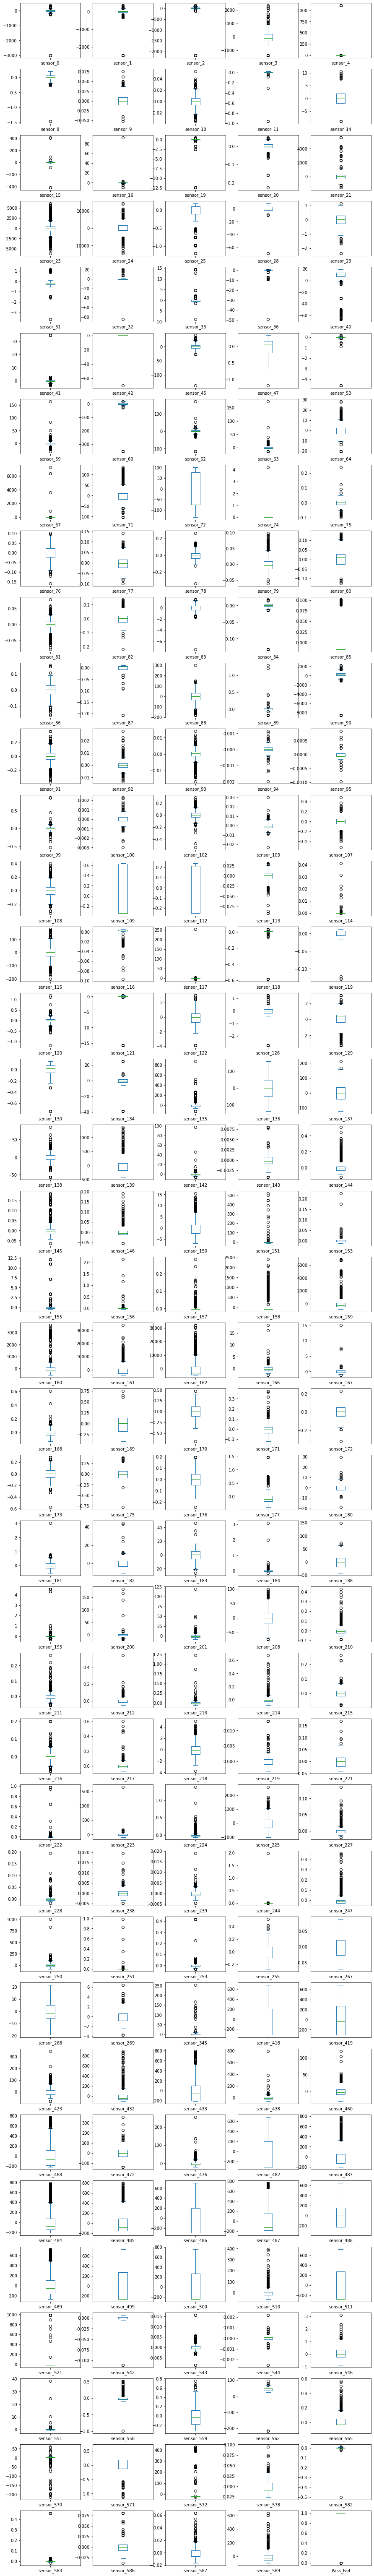

In [58]:
sensor.plot(kind='box', subplots=True,layout=(52,5), fontsize=10, figsize=(15,150));
plt.savefig('foo.png')

**Remark 12 on Outliers:**

1. There are many columns they posseses more than 5% of extreme values. For time being We will not call them outliers. Because of following obivious reasons:
                    we dont know the exact units or ranges of these sensors measurements. For exampls: Suppose sensor_15 can measure the values betweeen +int to -inf. However, We dont know what is correct values for that particular process where sensor_15 is taking measurements. In that case we need to see domain expert in this case semiconductor process or yield enginneer to provide the confidence on these readings.




#

#**2.7 Multivaret analysis:**

In [55]:
df1=pd.concat([df1,measurement['Pass_Fail']],1)

In [56]:
df1.head()

sensor_0  sensor_1   sensor_2   sensor_3  sensor_4  sensor_8  sensor_9  \
0   3030.93   2564.00  2187.7333  1411.1265    1.3602    1.5005    0.0162   
1   3095.78   2465.14  2230.4222  1463.6606    0.8294    1.4966   -0.0005   
2   2932.61   2559.94  2186.4111  1698.0172    1.5102    1.4436    0.0041   
3   2988.72   2479.90  2199.0333   909.7926    1.3204    1.4882   -0.0124   
4   3032.24   2502.87  2233.3667  1326.5200    1.5334    1.5031   -0.0031   

   sensor_10  sensor_11  sensor_14  ...  sensor_570  sensor_571  sensor_572  \
0    -0.0034     0.9455     7.9558  ...    533.8500      2.1113        8.95   
1    -0.0148     0.9627    10.1548  ...    535.0164      2.4335        5.92   
2     0.0013     0.9615     9.5157  ...    535.0245      2.0293       11.21   
3    -0.0033     0.9629     9.6052  ...    530.5682      2.0253        9.33   
4    -0.0072     0.9569    10.5661  ...    532.0155      2.0275        8.83   

   sensor_578  sensor_582  sensor_583  sensor_586  sensor_587  sensor_589  \
0      0.0000      0.5005      0.0118      0.0000      0.0000      0.0000   
1      0.0096      0.5019      0.0223      0.0096      0.0201    208.2045   
2      0.0584      0.4958      0.0157      0.0584      0.0484     82.8602   
3      0.0202      0.4990      0.0103      0.0202      0.0149     73.8432   
4      0.0000      0.4800      0.4766      0.0202      0.0149     73.8432   

   Pass_Fail  
0          1  
1          1  
2          0  
3          1  
4          1  

[5 rows x 195 columns]

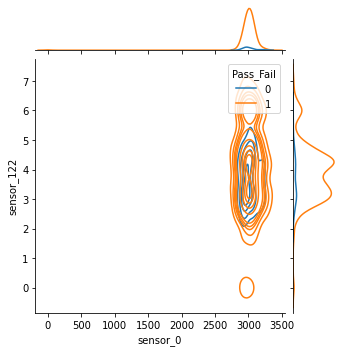

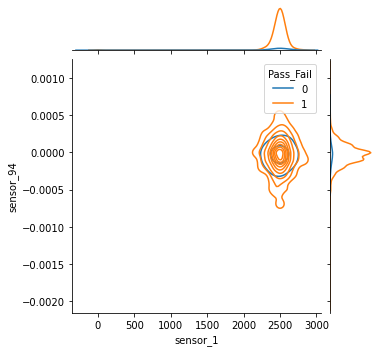

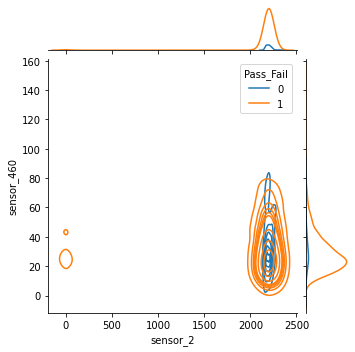

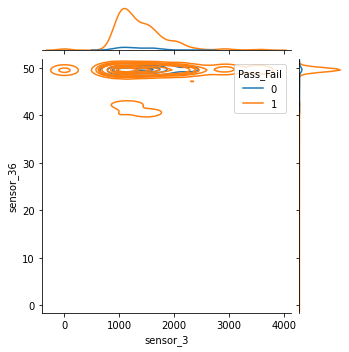

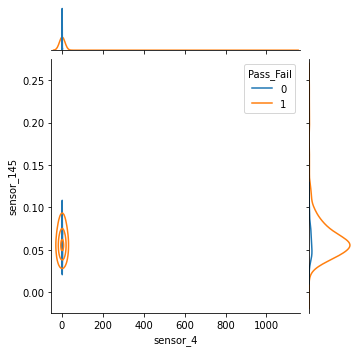

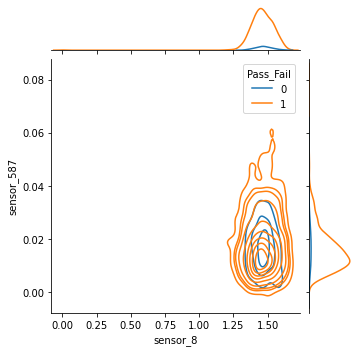

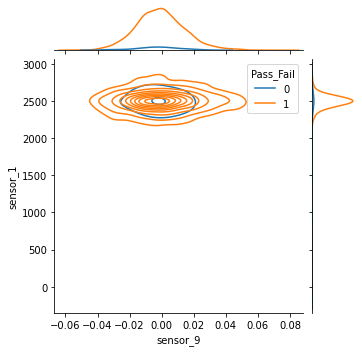

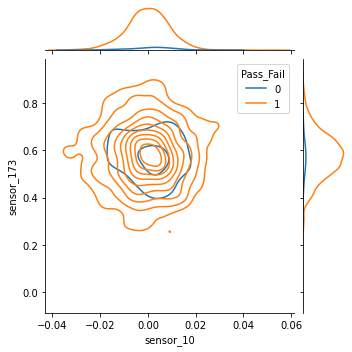

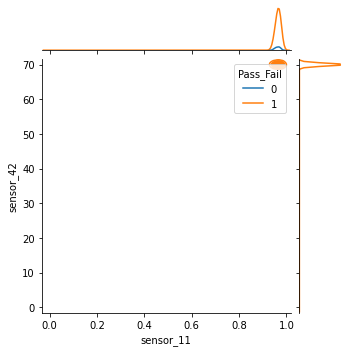

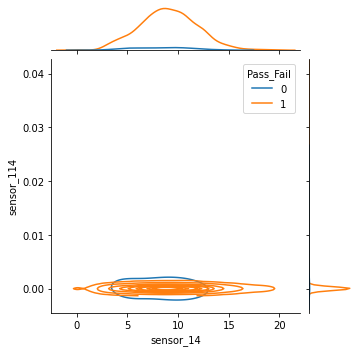

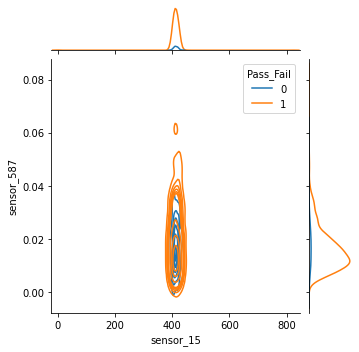

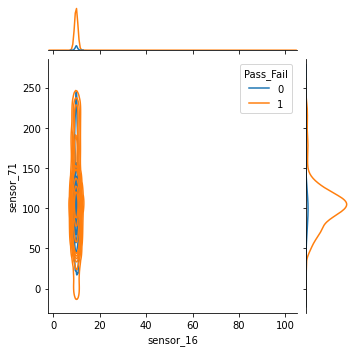

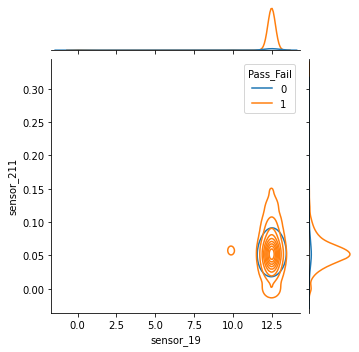

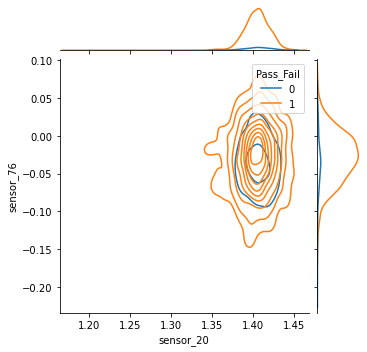

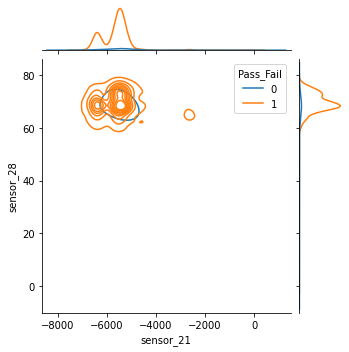

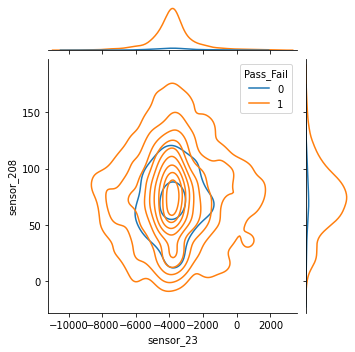

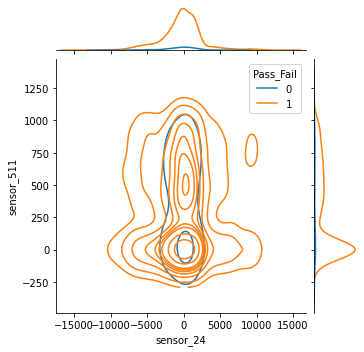

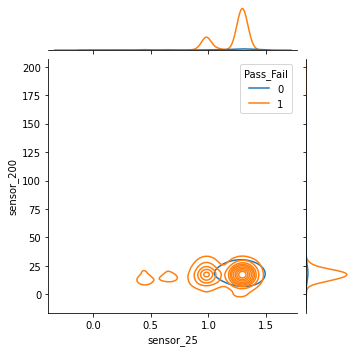

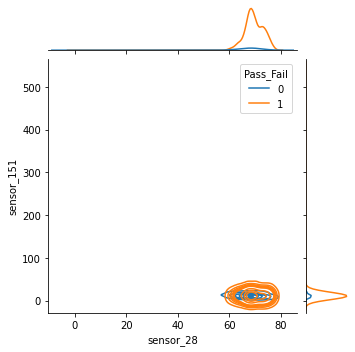

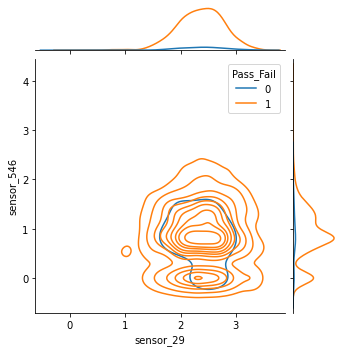

In [38]:
limit=[]
for i in df1.describe().columns:
     y = np.random.choice(list(df1.columns))
     #print(y)
     if i!=y:
        a= sns.jointplot(data=df1,x=df1[i],y=df1[y], hue="Pass_Fail",kind="kde",height=5)
        limit.append(a)
        if len(limit)==20:
          break
       

## **Pair Plot**

In [60]:
df2=df1.iloc[:,0:10]

In [61]:
df2=pd.concat([df2,measurement['Pass_Fail']],1)

In [62]:
df2.head()

sensor_0  sensor_1   sensor_2   sensor_3  sensor_4  sensor_8  sensor_9  \
0   3030.93   2564.00  2187.7333  1411.1265    1.3602    1.5005    0.0162   
1   3095.78   2465.14  2230.4222  1463.6606    0.8294    1.4966   -0.0005   
2   2932.61   2559.94  2186.4111  1698.0172    1.5102    1.4436    0.0041   
3   2988.72   2479.90  2199.0333   909.7926    1.3204    1.4882   -0.0124   
4   3032.24   2502.87  2233.3667  1326.5200    1.5334    1.5031   -0.0031   

   sensor_10  sensor_11  sensor_14  Pass_Fail  
0    -0.0034     0.9455     7.9558          1  
1    -0.0148     0.9627    10.1548          1  
2     0.0013     0.9615     9.5157          0  
3    -0.0033     0.9629     9.6052          1  
4    -0.0072     0.9569    10.5661          1

<Figure size 2000x2000 with 0 Axes>

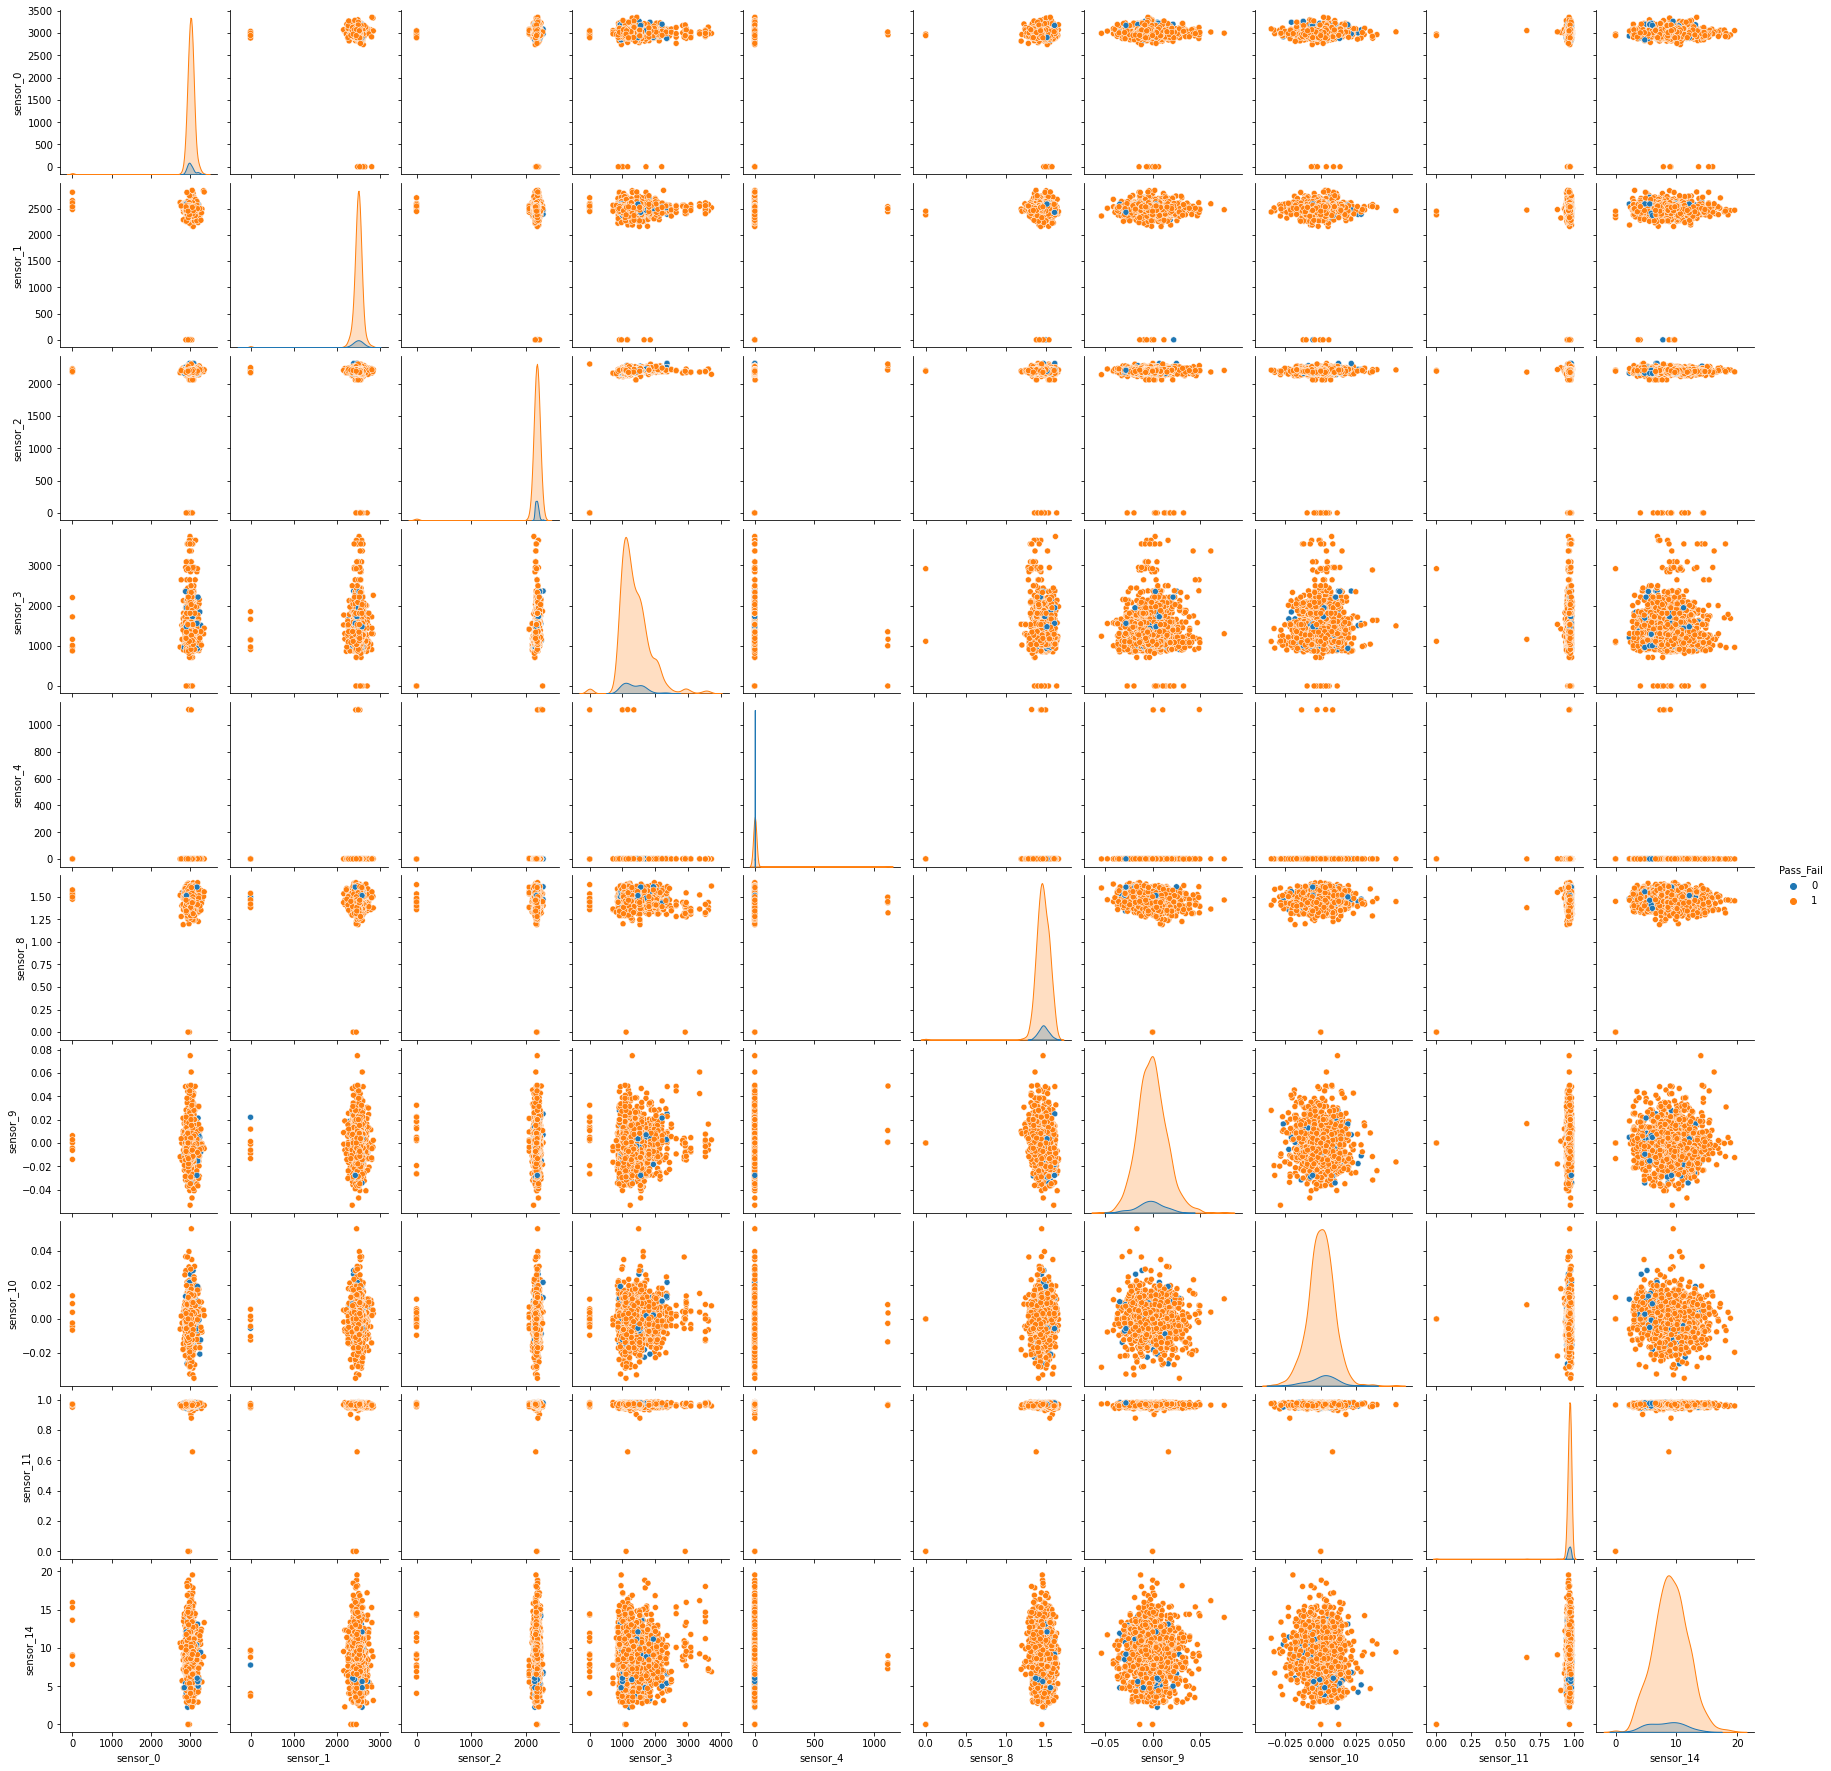

In [63]:
plt.figure(figsize=(10,10),dpi=200)
sns.pairplot(df2,kind='scatter',hue='Pass_Fail')
plt.savefig('pair_plot.png')

 **Remark 13 on Multivaret Analysis:**
 1. We have plot the first 15 sensors and its distribution based on class labels.
 2. The separation between "Pass_Fail" is not actually cleared from graphs.
 3. That means we need to do the Feature Transformation to separete between Pass_fail.

# Final Observations:
1. This is a binary classification problem with Higly imabalnced data.
1. Initially we had dataset with 592 Features. now we have reduce this dataset to 195 features.
2. We have removed 112 featuresbecause they had zero variance, so no learning for models.
3. We have filled missing values with zero becuase we have observe that these values also have patterns. By studing these patters we coclude that the it is not fault of sensors but it might be the process is not going on.So the sensor did not measure and thats why these values are missing.
4. Another Important data preporcessing we did is to remove the collinearity in features. We have found 285 features are highly correlated > 70% and we have removed them.
5. We have found that the large no of outliers in some columns and we have decided that we will keeop them for ime being. As we dont know the groud thruth about the how these measurement were taken. We will have to see domain expert to colclude them as ouliers. Also, If we removed them then we may loose good data.